In [1]:
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils
from keras.models import Sequential
from keras.utils import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

In [2]:
path = r"C:\\Users\\USER\\Desktop\\font_original" #원본 이미지 경로 
copy_path = r"C:\\Users\\USER\\Desktop\\font_classifier" #복사 및 분류된 이미지 경로
#font_classifier 안에 모든 글꼴 이미지들이 다 저장되어 있음 (따로 하위폴더 없음)
#노트북 경로

### 데이터셋 준비

In [3]:
import splitfolders

splitfolders.ratio(path, output=copy_path, seed = 43, ratio = (.5,.2,.3))

Copying files: 55860 files [02:43, 342.56 files/s]


In [4]:
print(len(os.listdir(copy_path + '\\val')))
print(len(os.listdir(copy_path + '\\train')))
print(len(os.listdir(copy_path + '\\test')))

5
5
5


### 데이터셋 정형화

In [5]:
trainDataGen = ImageDataGenerator(rescale=1./255)

In [6]:
currentPath = copy_path + '\\train'

In [7]:
trainGenSet = trainDataGen.flow_from_directory(
    currentPath,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 27930 images belonging to 5 classes.


-------------

In [8]:
valDataGen = ImageDataGenerator(rescale=1./255)

In [9]:
currentPath = copy_path + '\\val'

In [10]:
valGenSet = valDataGen.flow_from_directory(
    currentPath,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 11170 images belonging to 5 classes.


---------------------

In [22]:
testDataGen = ImageDataGenerator(rescale=1./255,
                                 rotation_range = 30,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest'
                                 )

In [23]:
currentPath = copy_path + '\\test'

In [24]:
testGenSet = testDataGen.flow_from_directory(
    currentPath,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 16760 images belonging to 5 classes.


--------

### 모델 구성

In [25]:
# 모델 구성
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(28,28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
    
model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  #18로 되어있었는데, 출력 라벨을 바꿔야 할 거 같은 구글링 결과가 나와서 바꿔봄...! => 성공!!! (validation, train의 라벨이 다 같아야 함!!)

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 128)        

### 모델 훈련

In [27]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
results = model.fit(
    trainGenSet,
    steps_per_epoch=40,
    epochs=50,
    validation_data=valGenSet,
    validation_steps=20
)

Epoch 1/50
40/40 [==============================] - 16s 396ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0077 - val_accuracy: 0.9984
Epoch 2/50
40/40 [==============================] - 15s 376ms/step - loss: 0.0101 - accuracy: 0.9945 - val_loss: 0.0014 - val_accuracy: 0.9992
Epoch 3/50
40/40 [==============================] - 15s 366ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.0027 - val_accuracy: 0.9992
Epoch 4/50
40/40 [==============================] - 14s 355ms/step - loss: 0.0051 - accuracy: 0.9980 - val_loss: 0.0056 - val_accuracy: 0.9992
Epoch 5/50
40/40 [==============================] - 14s 348ms/step - loss: 0.0139 - accuracy: 0.9941 - val_loss: 0.0041 - val_accuracy: 0.9984
Epoch 6/50
40/40 [==============================] - 14s 342ms/step - loss: 0.0092 - accuracy: 0.9965 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 7/50
40/40 [==============================] - 13s 330ms/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 0.0033 - val_accuracy: 0.9984

### 모델 accuracy, loss 그래프로 표현

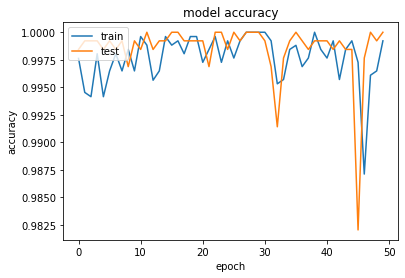

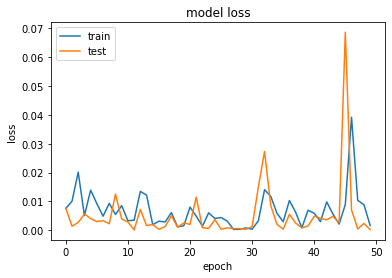

In [32]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 모델 테스트 및 정확도 출력 

In [33]:
scores = model.evaluate_generator(testGenSet)
print(scores)

C:\Users\USER\AppData\Local\Temp\ipykernel_1528\3026207986.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(testGenSet)


[2.0828511714935303, 0.598508358001709]
